In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')


In [61]:
sv=LinearSVC()
et=ExtraTreesClassifier()
kn=KNeighborsClassifier(n_neighbors=5)

lr=LogisticRegression()
xg=xgb.XGBClassifier()
mnb=MultinomialNB()
rt=RandomForestClassifier()
lg=lgb.LGBMClassifier()

In [241]:
def printacc(y_pred,y_test):
    print(" Accuracy Score :",accuracy_score(y_pred,y_test))
    print("F1 Score :",f1_score(y_pred,y_test))
    print("Classification Report : ",classification_report(y_test,y_pred))
    
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()



def check_models_acc(X_train,y_train,X_test,y_test):
   
        
    xg.fit(X_train,y_train)
    y_pred=xg.predict(X_test)
    print('XGboost')
    printacc(y_pred,y_test)
    
    et.fit(X_train,y_train)
    y_pred=et.predict(X_test)
   
    print('Extra tree class')
    printacc(y_pred,y_test)
    
        
    rt.fit(X_train,y_train)
    y_pred=rt.predict(X_test)
    
    print('random forest')
    printacc(y_pred,y_test)
    
    
    lg.fit(X_train,y_train)
    y_pred=lg.predict(X_test)
    print('Lightgbm')
    printacc(y_pred,y_test)
    
    
    '''
    
    kn.fit(X_train,y_train)
    y_pred=kn.predict(X_test)
    print('KNN')
    printacc(y_pred,y_test)
    
    
    
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    print('logistic regression')
    printacc(y_pred,y_test)
    
    


     
   
    sv.fit(X_train,y_train)
    y_pred=sv.predict(X_test)
    print('SVM')
    printacc(y_pred,y_test)
     

       
    
     
    
    mnb.fit(X_train,y_train)

    y_pred=mnb.predict(X_test)
    
    print('multi nomial')
    printacc(y_pred,y_test)
    '''
    
    
def checkDist(y):

    unique_elements, counts_elements = np.unique(y, return_counts=True)

    print("Frequency of unique values of the said array: y ")
    print(np.asarray((unique_elements, counts_elements)))
    print('\n')
    print('\n')
    print('\n')


def chechpredict():
   
    print(" XGBoost ")
    ypr=xg.predict(Xt)
    checkDist(ypr)
  
    print(" extra  tree ")
    ypr=et.predict(Xt)
    checkDist(ypr)
    
    
    print(" random forest ")
    ypr=rt.predict(Xt)
    checkDist(ypr)
    
    print(" lightgbm ")
    ypr=lg.predict(Xt)
    checkDist(ypr)
    
   
    '''
    print(" logistic regression")
    ypr=lr.predict(Xt)
    checkDist(ypr)
    
    print(" kNN ")
    ypr=kn.predict(Xt)
    checkDist(ypr)
    

    
    
    print(" multinomial")
    ypr=mnb.predict(Xt)
    checkDist(ypr)
    print(" svm")
    
    ypr=sv.predict(Xt)
    checkDist(ypr)
    
    '''



In [304]:
df=pd.read_csv('train.csv')
#df['first_payment_month']=df.first_payment_date.apply(lambda x:x.split('/')[0])

#df['first_payment_month']=df.first_payment_month.astype('object')
#df['origination_month']=df.origination_date.apply(lambda x:x.split('-')[1])

#df['origination_month']=df.origination_month.astype('object')

df['mt']=df.m1+df.m2+df.m3+df.m4+df.m5+df.m6+df.m7+df.m8+df.m9+df.m10+df.m11+df.m12

df = shuffle(df)




y=df.m13.values

df.drop(['insurance_type','financial_institution','origination_date','first_payment_date','m13','loan_id'],axis=1,inplace=True)
  
df=pd.get_dummies(df)

X=df.values
sc=StandardScaler()
sc.fit_transform(X)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [305]:
month_to_num={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
dt=pd.read_csv('test.csv')
#dt['first_payment_month']=dt.first_payment_date.apply(lambda x:month_to_num[x.split('-')[0]])

#dt['first_payment_month']=dt.first_payment_month.astype('object')
#dt['origination_month']=dt.origination_date.apply(lambda x:x.split('/')[1])

#dt['origination_month']=dt.origination_month.astype('object')
dt['mt']=dt.m1+dt.m2+dt.m3+dt.m4+dt.m5+dt.m6+dt.m7+dt.m8+dt.m9+dt.m10+dt.m11+dt.m12

l1=dt.loan_id
#dt.drop(['origination_date','first_payment_date','loan_id'],axis=1,inplace=True)
#dt.drop(['origination_date','first_payment_date','source','financial_institution','loan_purpose','loan_id'],axis=1,inplace=True)
dt.drop(['insurance_type','financial_institution','origination_date','first_payment_date','loan_id'],axis=1,inplace=True)
    
dt=pd.get_dummies(dt)
Xt=dt.values

Xt=sc.transform(Xt)


In [206]:
checkDist(y)

Frequency of unique values of the said array: y 
[[     0      1]
 [115422    636]]








In [223]:
Xt.shape

(35866, 27)

In [60]:
check_models_acc(X_train,y_train,X_test,y_test)

SVM
 Accuracy Score : 0.9946866563271871
F1 Score : 0.0
Extra tree class
 Accuracy Score : 0.9953472341892124
F1 Score : 0.3955223880597015
KNN
 Accuracy Score : 0.9945717732207479
F1 Score : 0.010471204188481676
logistic regression
 Accuracy Score : 0.9942558446780401
F1 Score : 0.0
XGboost
 Accuracy Score : 0.9957780458383595
F1 Score : 0.47686832740213525
multi nomial
 Accuracy Score : 0.5902119593313804
F1 Score : 0.01694915254237288
random forest
 Accuracy Score : 0.9957493250617496
F1 Score : 0.40322580645161293
Lightgbm
 Accuracy Score : 0.9945717732207479
F1 Score : 0.35051546391752575


In [56]:
df.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'source_X',
       'source_Y', 'source_Z', 'loan_purpose_A23', 'loan_purpose_B12',
       'loan_purpose_C86', 'first_payment_month_02', 'first_payment_month_03',
       'first_payment_month_04', 'first_payment_month_05',
       'origination_month_01', 'origination_month_02', 'origination_month_03'],
      dtype='object')

Removed indexes: [ 64733  20810 113021 ... 115649 115740 115946]


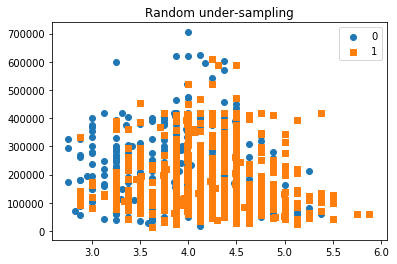

In [182]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [183]:
check_models_acc(X_rus,y_rus,X_test,y_test)

XGboost
 Accuracy Score : 0.9059107358262968
F1 Score : 0.08266129032258064
Extra tree class
 Accuracy Score : 0.88423229364122
F1 Score : 0.08249112264408631
random forest
 Accuracy Score : 0.9102188523177667
F1 Score : 0.10079392474974112
Lightgbm
 Accuracy Score : 0.8743753231087369
F1 Score : 0.07651380795540917


In [184]:
chechpredict()

 XGBoost 
Frequency of unique values of the said array: y 
[[    0     1]
 [19426 16440]]






 extra  tree 
Frequency of unique values of the said array: y 
[[    0     1]
 [26545  9321]]






 random forest 
Frequency of unique values of the said array: y 
[[    0     1]
 [32754  3112]]






 lightgbm 
Frequency of unique values of the said array: y 
[[    0     1]
 [    5 35861]]








114786 new random picked points


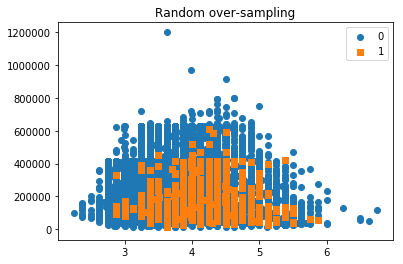

In [221]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [222]:
check_models_acc(X_ros,y_ros,X_test,y_test)
chechpredict()

XGboost
 Accuracy Score : 0.9116663794589006
F1 Score : 0.08562254727078132
Extra tree class
 Accuracy Score : 1.0
F1 Score : 1.0
random forest
 Accuracy Score : 1.0
F1 Score : 1.0
Lightgbm
 Accuracy Score : 0.9753231087368602
F1 Score : 0.29941291585127205
 XGBoost 
Frequency of unique values of the said array: y 
[[    0     1]
 [35688   178]]






 extra  tree 
Frequency of unique values of the said array: y 
[[    0     1]
 [35828    38]]






 random forest 
Frequency of unique values of the said array: y 
[[    0]
 [35866]]






 lightgbm 
Frequency of unique values of the said array: y 
[[    0     1]
 [35720   146]]








Removed indexes: [     0      1      2 ... 116055 116056 116057]


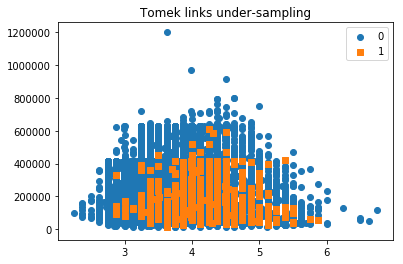

In [187]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [188]:
check_models_acc(X_tl,y_tl,X_test,y_test)
chechpredict()

XGboost
 Accuracy Score : 0.9968981561261416
F1 Score : 0.6153846153846154
Extra tree class
 Accuracy Score : 1.0
F1 Score : 1.0
random forest
 Accuracy Score : 0.9994485610890919
F1 Score : 0.9440559440559442
Lightgbm
 Accuracy Score : 0.9966224366706876
F1 Score : 0.6370370370370371
 XGBoost 
Frequency of unique values of the said array: y 
[[    0     1]
 [35786    80]]






 extra  tree 
Frequency of unique values of the said array: y 
[[    0     1]
 [35754   112]]






 random forest 
Frequency of unique values of the said array: y 
[[    0     1]
 [35718   148]]






 lightgbm 
Frequency of unique values of the said array: y 
[[    0     1]
 [35682   184]]








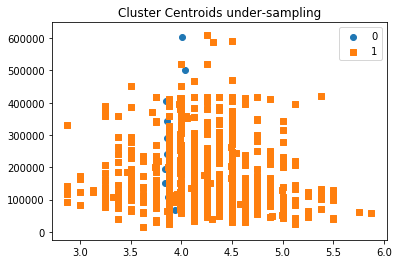

In [189]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

In [190]:
check_models_acc(X_cc,y_cc,X_test,y_test)
chechpredict()

XGboost
 Accuracy Score : 0.005204204721695675
F1 Score : 0.01035452238908318
Extra tree class
 Accuracy Score : 0.005204204721695675
F1 Score : 0.01035452238908318
random forest
 Accuracy Score : 0.005204204721695675
F1 Score : 0.01035452238908318
Lightgbm
 Accuracy Score : 0.005204204721695675
F1 Score : 0.01035452238908318
 XGBoost 
Frequency of unique values of the said array: y 
[[    1]
 [35866]]






 extra  tree 
Frequency of unique values of the said array: y 
[[    1]
 [35866]]






 random forest 
Frequency of unique values of the said array: y 
[[    1]
 [35866]]






 lightgbm 
Frequency of unique values of the said array: y 
[[    1]
 [35866]]








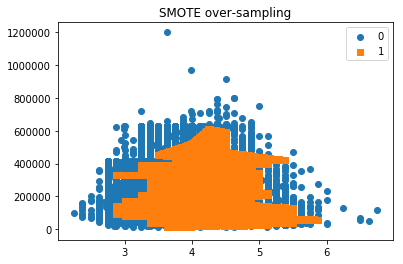

In [299]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [300]:
check_models_acc(X_sm,y_sm,X_test,y_test)
chechpredict()

XGboost
 Accuracy Score : 0.9894881957608134
F1 Score : 0.39
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99     23066
           1       0.31      0.53      0.39       146

    accuracy                           0.99     23212
   macro avg       0.65      0.76      0.69     23212
weighted avg       0.99      0.99      0.99     23212

Extra tree class
 Accuracy Score : 1.0
F1 Score : 1.0
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23066
           1       1.00      1.00      1.00       146

    accuracy                           1.00     23212
   macro avg       1.00      1.00      1.00     23212
weighted avg       1.00      1.00      1.00     23212

random forest
 Accuracy Score : 0.9990522143718766
F1 Score : 0.9197080291970804
Classification Report :                precision    recall  f1-score   support

           0       1

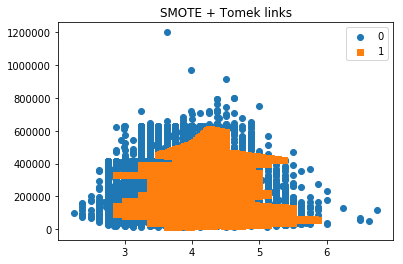

In [301]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [302]:
check_models_acc(X_smt,y_smt,X_test,y_test)
chechpredict()

XGboost
 Accuracy Score : 0.9901344132345339
F1 Score : 0.4051948051948052
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.99      1.00     23066
           1       0.33      0.53      0.41       146

    accuracy                           0.99     23212
   macro avg       0.66      0.76      0.70     23212
weighted avg       0.99      0.99      0.99     23212

Extra tree class
 Accuracy Score : 0.9999138376701706
F1 Score : 0.993103448275862
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23066
           1       1.00      0.99      0.99       146

    accuracy                           1.00     23212
   macro avg       1.00      0.99      1.00     23212
weighted avg       1.00      1.00      1.00     23212

random forest
 Accuracy Score : 0.9992245390315354
F1 Score : 0.935251798561151
Classification Report :                precision    recall

In [303]:
ypr=xg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XG3.csv',index=False)

ypr=lg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_lG3.csv',index=False)

ypr=et.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XT3.csv',index=False)



In [207]:
#selected sampling 

Removed indexes: [     0      1      2 ... 116055 116056 116057]


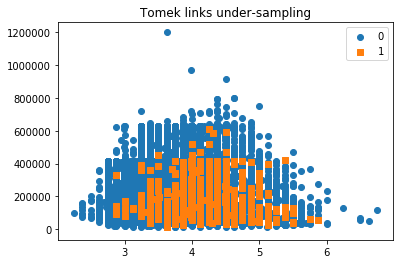

In [224]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [225]:
check_models_acc(X_tl,y_tl,X_test,y_test)
chechpredict()

XGboost
 Accuracy Score : 0.9964845769429606
F1 Score : 0.560344827586207
Extra tree class
 Accuracy Score : 1.0
F1 Score : 1.0
random forest
 Accuracy Score : 0.9990694468378425
F1 Score : 0.9059233449477352
Lightgbm
 Accuracy Score : 0.9964845769429606
F1 Score : 0.6015625000000001
 XGBoost 
Frequency of unique values of the said array: y 
[[    0     1]
 [35781    85]]






 extra  tree 
Frequency of unique values of the said array: y 
[[    0     1]
 [35773    93]]






 random forest 
Frequency of unique values of the said array: y 
[[    0     1]
 [35773    93]]






 lightgbm 
Frequency of unique values of the said array: y 
[[    0     1]
 [35672   194]]








In [210]:
ypr=rt.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_RT1.csv',index=False)



In [211]:
ypr=et.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XT1.csv',index=False)

In [212]:
ypr=xg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XG1.csv',index=False)

ypr=lg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_lG1.csv',index=False)

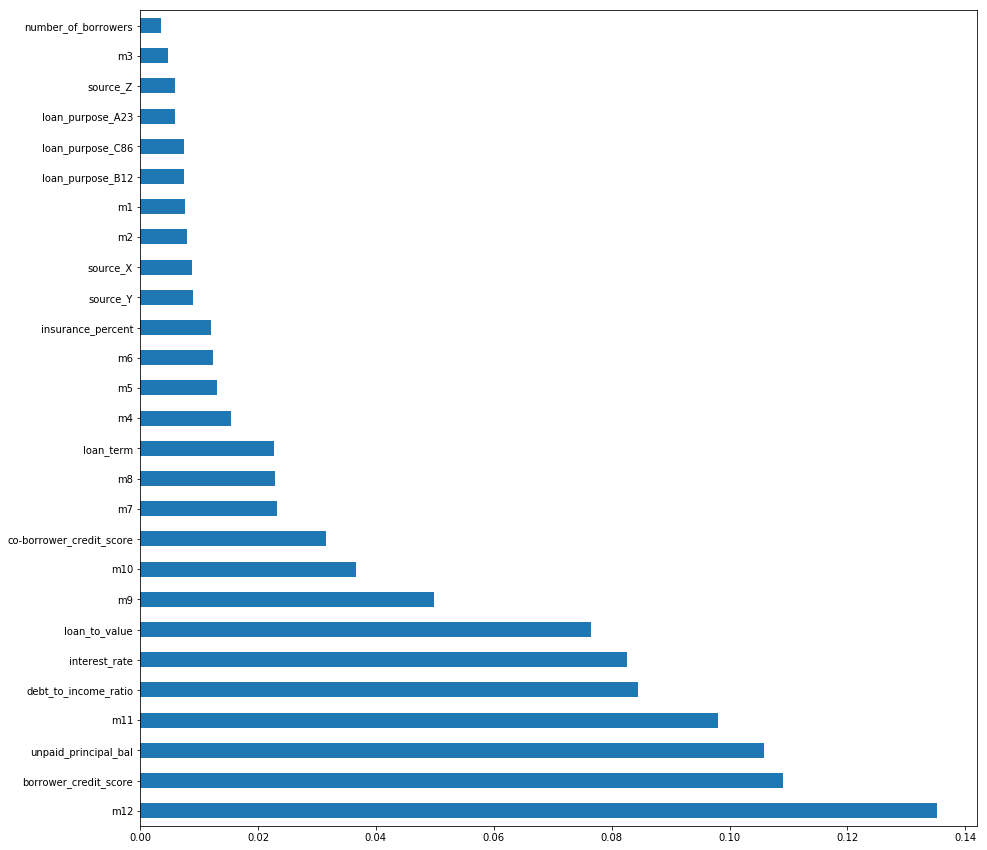

In [214]:

plt.figure(figsize=(15,15))
feat_importances = pd.Series(et.feature_importances_, index=df.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

114786 new random picked points


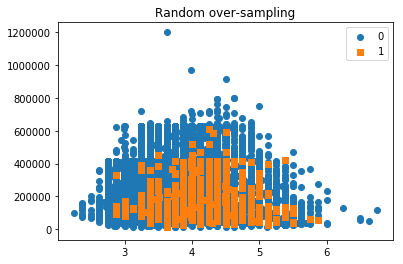

In [215]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [216]:
check_models_acc(X_ros,y_ros,X_test,y_test)
chechpredict()

XGboost
 Accuracy Score : 0.9137342753748061
F1 Score : 0.08816029143897998
Extra tree class
 Accuracy Score : 1.0
F1 Score : 1.0
random forest
 Accuracy Score : 0.9999655350680683
F1 Score : 0.9968051118210862
Lightgbm
 Accuracy Score : 0.9735309322764087
F1 Score : 0.2849162011173184
 XGBoost 
Frequency of unique values of the said array: y 
[[    0     1]
 [35697   169]]






 extra  tree 
Frequency of unique values of the said array: y 
[[    0     1]
 [35789    77]]






 random forest 
Frequency of unique values of the said array: y 
[[    0]
 [35866]]






 lightgbm 
Frequency of unique values of the said array: y 
[[    0     1]
 [35699   167]]








In [217]:
ypr=rt.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_RT2.csv',index=False)


ypr=et.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XT2.csv',index=False)

ypr=xg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_XG2.csv',index=False)

ypr=lg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_lG2.csv',index=False)

In [ ]:
# selected sampling omek links under-sampling

Removed indexes: [     0      1      2 ... 116055 116056 116057]


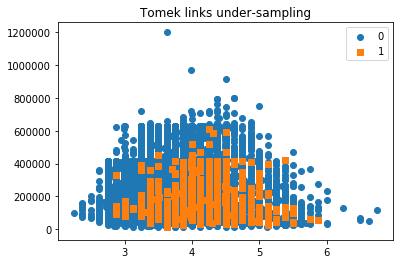

In [306]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [307]:
# selected Algo
# Extra tree classifier light gbm
check_models_acc(X_tl,y_tl,X_test,y_test)
chechpredict()

XGboost
 Accuracy Score : 0.9962519386524211
F1 Score : 0.5671641791044776
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23078
           1       0.85      0.43      0.57       134

    accuracy                           1.00     23212
   macro avg       0.92      0.71      0.78     23212
weighted avg       1.00      1.00      1.00     23212

Extra tree class
 Accuracy Score : 1.0
F1 Score : 1.0
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23078
           1       1.00      1.00      1.00       134

    accuracy                           1.00     23212
   macro avg       1.00      1.00      1.00     23212
weighted avg       1.00      1.00      1.00     23212

random forest
 Accuracy Score : 0.9988368085473032
F1 Score : 0.888888888888889
Classification Report :                precision    recall  f1-score   support

       

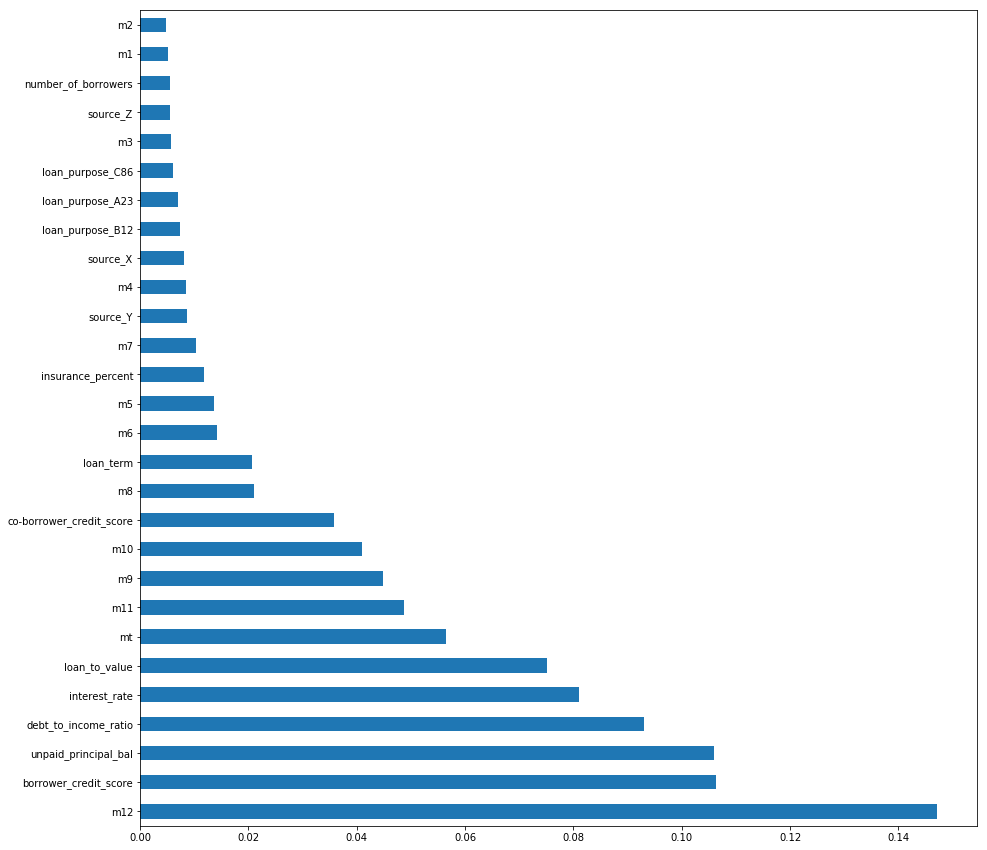

In [308]:

plt.figure(figsize=(15,15))
feat_importances = pd.Series(et.feature_importances_, index=df.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [294]:
print(cross_val_score(et, X_tl, y_tl, scoring='f1_weighted', cv = 10))

[0.99429399 0.99510791 0.9946256  0.99510791 0.99556932 0.99442758
 0.99546139 0.99533591 0.9950996  0.99438951]


In [295]:
print(cross_val_score(lg, X_tl, y_tl, scoring='f1_weighted', cv = 10))

[0.99351408 0.99443556 0.99377142 0.99321503 0.99459647 0.99420947
 0.99428536 0.99400788 0.99421028 0.99335119]


In [296]:
chechpredict()

 XGBoost 
Frequency of unique values of the said array: y 
[[    0     1]
 [35785    81]]






 extra  tree 
Frequency of unique values of the said array: y 
[[    0     1]
 [35764   102]]






 random forest 
Frequency of unique values of the said array: y 
[[    0     1]
 [35795    71]]






 lightgbm 
Frequency of unique values of the said array: y 
[[    0     1]
 [35852    14]]








In [288]:
ypr=lg.predict(Xt)
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_lG1.csv',index=False)

In [311]:
X_tl.shape

(115782, 28)

In [312]:
extc = ExtraTreesClassifier(n_estimators=700,max_features= 25,criterion= 'entropy',min_samples_split= 5,
                            max_depth= 50, min_samples_leaf= 5)

In [313]:
extc.fit(X_tl,y_tl)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=50, max_features=25, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=700,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [314]:
y_pred=extc.predict(X_test)

In [315]:
printacc(y_pred,y_test)

 Accuracy Score : 0.9968119937963122
F1 Score : 0.6372549019607843
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23078
           1       0.93      0.49      0.64       134

    accuracy                           1.00     23212
   macro avg       0.96      0.74      0.82     23212
weighted avg       1.00      1.00      1.00     23212



In [317]:
ypr=extc.predict(Xt)
checkDist(ypr)

Frequency of unique values of the said array: y 
[[    0     1]
 [35718   148]]








In [318]:
tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

tp.to_csv('Submission_sampl_EXT1.csv',index=False)

In [320]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [322]:
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [324]:
gs.fit(X_tl, y_tl)
print('Best score reached: {} with params: {} '.format(gs.best_sco re_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 67.9min finished


Best score reached: 0.90116944230606 with params: {'colsample_bytree': 0.502738421434817, 'min_child_samples': 312, 'min_child_weight': 10.0, 'num_leaves': 37, 'reg_alpha': 50, 'reg_lambda': 100, 'subsample': 0.4807019566171228} 


In [325]:
ypr=gs.predict(Xt)
checkDist(ypr)

Frequency of unique values of the said array: y 
[[    0     1]
 [35792    74]]








In [326]:
y_pred=gs.predict(X_test)
printacc(y_pred,y_test)

 Accuracy Score : 0.9958211270032742
F1 Score : 0.5125628140703518
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23078
           1       0.78      0.38      0.51       134

    accuracy                           1.00     23212
   macro avg       0.89      0.69      0.76     23212
weighted avg       1.00      1.00      1.00     23212

